## Test on rosette mesh

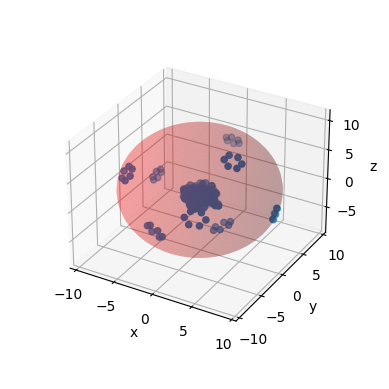

[-0.13761076 -0.05537937  1.15072722] 9.324027289489914


In [254]:
import miniball
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

# load mesh
mesh_file = '/Users/josephko/research/ice_renders/20230329_serial/ros_n9_a0.50_c3.25_5.stl'
mesh = pv.read(mesh_file)

# import points and get center and radius of bounding sphere
mesh_points = np.asarray(mesh.points)
c, r2 = miniball.get_bounding_ball(mesh_points)
r = np.sqrt(r2) # r2 = radius squared, r = radius

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plot points
ax.scatter(mesh_points[:,0], mesh_points[:,1], mesh_points[:,2])

# plot sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)
ax.plot_surface(x+c[0], y+c[1], z+c[2], color='r', alpha=0.2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()
print(c, r)


In [255]:
# plot with pyvista
pl = pv.Plotter()
pl.add_mesh(mesh, opacity=0.5)
bounding_sphere = pv.Sphere(radius=r, center=c)
pl.add_mesh(bounding_sphere, opacity=0.2, style='wireframe')
pl.add_points(mesh_points, color='red', point_size = 5.0)
pl.show()

Widget(value="<iframe src='http://localhost:64482/index.html?ui=P_0x2ea306050_30&reconnect=auto' style='width:…